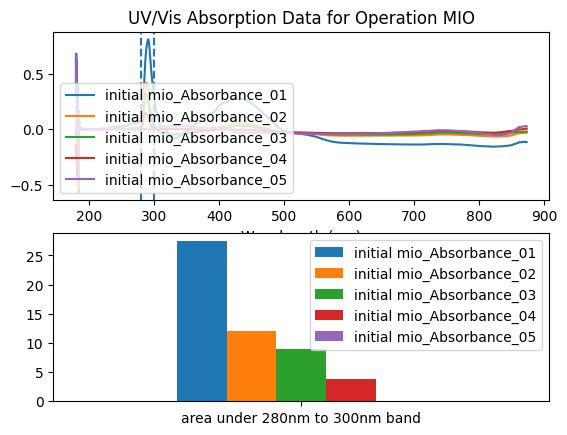

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def WavelengthToIndex(wavelength: float)-> int:
    '''returns index of input wavelength by subtracting input value from wavelength list and returning the index of the new minimum value'''
    difference_array = np.absolute(df_wavelengths - wavelength)
    index = difference_array.argmin()
    return index

## Create Dataframe of Raw Spectra from Given Directory ##
specDir = r'Spectra\230112_operationMio\Operation MIO'
df_list = []
first = True

for file in os.listdir(specDir):
    trial = file[:-4]
    if first == True:
        df_temp = pd.read_csv(os.path.join(specDir, file), skiprows = 13, names = ['Wavelength (nm)', trial], delim_whitespace=True)
        df_temp.set_index('Wavelength (nm)')
        df_wavelengths = df_temp['Wavelength (nm)']
        df_list.append(df_temp['Wavelength (nm)'])
        first = False
    df_temp = pd.read_csv(os.path.join(specDir, file), skiprows = 13, names = ['Wavelength (nm)', trial], delim_whitespace=True)
    df_list.append(df_temp[trial])

df_spectra = pd.concat(df_list, axis=1)


## Baseline Correct, Normalize, and Integrate Spectra ##
baselineIndex = WavelengthToIndex(200)
# normalIndex = n/a
wavelengthBound_low, wavelengthBound_high = 280, 300
absBoundIndex_low, absBoundIndex_high = WavelengthToIndex(wavelengthBound_low), WavelengthToIndex(wavelengthBound_high)
first = True
area_dict = {}
for column in df_spectra:
    if first == False:
        ## Baseline Correction
        baselineVal = df_spectra[column][baselineIndex]
        df_spectra[column] -= baselineVal

        ## Normalization (if needed)
        # normalVal = df[column][normalIndex]
        # df[column] += 1e-10
        # df[column] /= normalVal

        ## Integration
        area = np.trapz(df_spectra[column][absBoundIndex_low:absBoundIndex_high])
        area_dict.update({column:area})
    else:
        first = False

df_areas = pd.DataFrame(data = area_dict, index = ['area under {}nm to {}nm band'.format(wavelengthBound_low, wavelengthBound_high)])

## Plot spectra ##
fig, axes = plt.subplots(nrows = 2)
title = 'UV/Vis Absorption Data for {}'.format(os.path.basename(specDir))
df_spectra.plot(ax = axes[0], x = 'Wavelength (nm)', use_index = True, title = title)
axes[0].axvline(wavelengthBound_low, ls = '--')
axes[0].axvline(wavelengthBound_high, ls = '--')
df_areas.plot.bar(ax = axes[1], rot = 0)
plt.show()